# Task 1: Exploratory Data Analysis - Fraud Data
This notebook explores the e-commerce fraud dataset, focusing on univariate and bivariate analysis, geolocation insights, and class imbalance.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

if 'src.utils' in sys.modules:
    del sys.modules['src.utils']
if 'src.data_preprocessing' in sys.modules:
    del sys.modules['src.data_preprocessing']

sys.path.append(os.path.abspath('..'))

from src.data_preprocessing import load_data, clean_data, feature_engineer_fraud
from src.utils import save_stats, save_plot

In [8]:
fraud_path = '../data/raw/Fraud_Data.csv'
ip_path = '../data/raw/IpAddress_to_Country.csv'
credit_path = '../data/raw/creditcard.csv'

fraud_df, ip_df, credit_df = load_data(fraud_path, ip_path, credit_path)
print(f"Initial data shape: {fraud_df.shape}")

Initial data shape: (151112, 11)


## 1. Data Cleaning
We handle missing values and duplicates.

In [9]:
fraud_df = clean_data(fraud_df)
print(f"Cleaned data shape: {fraud_df.shape}")

Cleaned data shape: (151112, 11)


## 2. Univariate Analysis
Analyzing the distribution of key variables.

/tmp/ipykernel_3879/537748050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=fraud_df, palette='viridis')


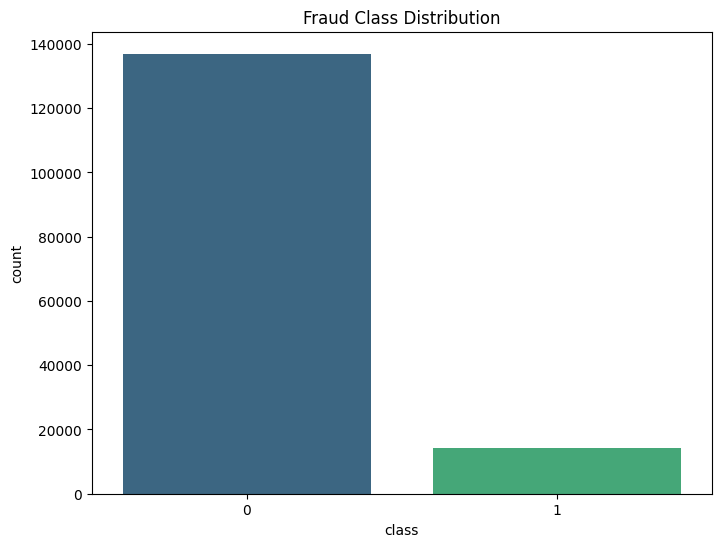

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=fraud_df, palette='viridis')
plt.title('Fraud Class Distribution')
plt.show()
print(fraud_df['class'].value_counts(normalize=True))

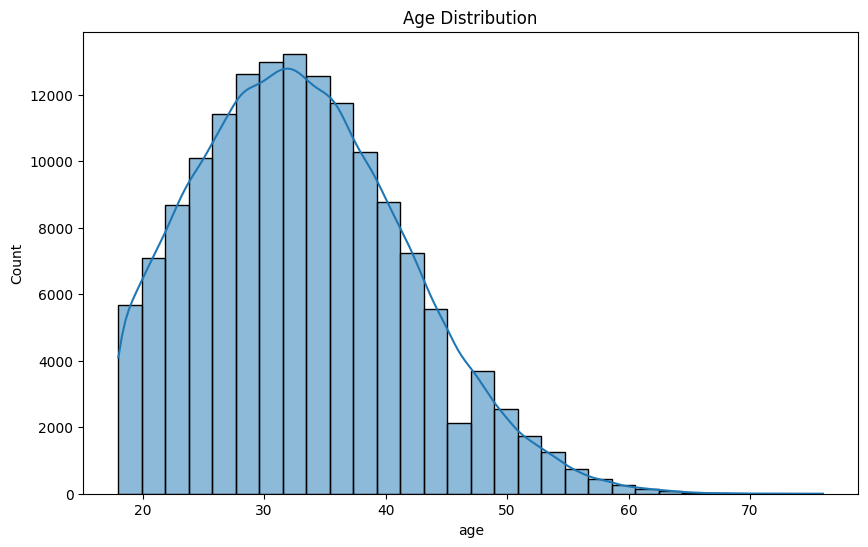

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

## 3. Geolocation Analysis
Mapping IP addresses to countries and analyzing fraud rates.

In [12]:
fraud_df = feature_engineer_fraud(fraud_df, ip_df)
country_fraud = fraud_df.groupby('country')['class'].mean().sort_values(ascending=False).head(10)
print("Top 10 Fraudulent Countries (by rate):")
print(country_fraud)

Top 10 Fraudulent Countries (by rate):
country
Unknown    0.093646
Name: class, dtype: float64


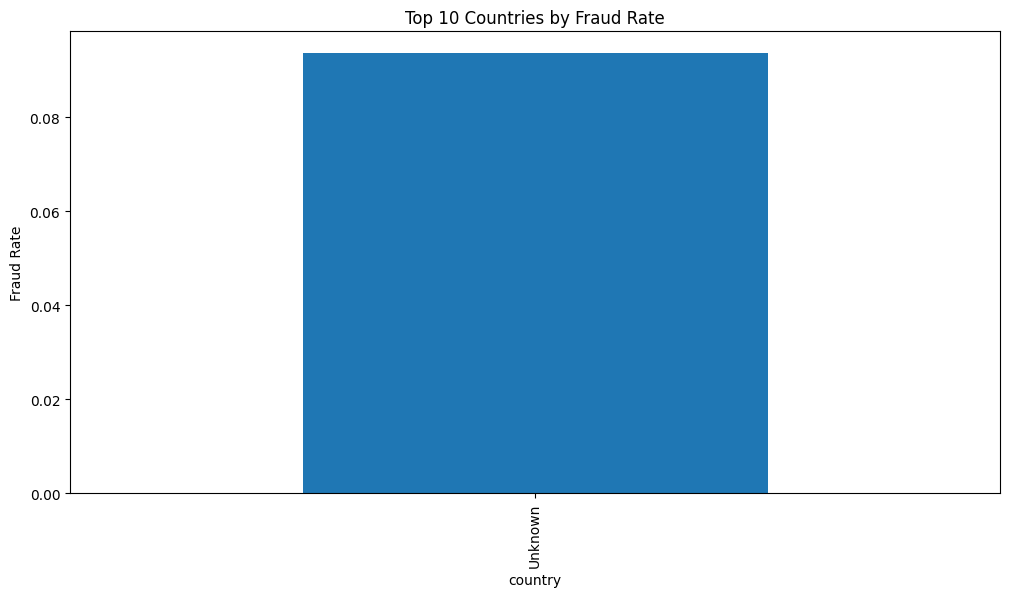

In [13]:
plt.figure(figsize=(12, 6))
country_fraud.plot(kind='bar')
plt.title('Top 10 Countries by Fraud Rate')
plt.ylabel('Fraud Rate')
plt.show()

## 4. Bivariate Analysis
Relationship between features and fraud.

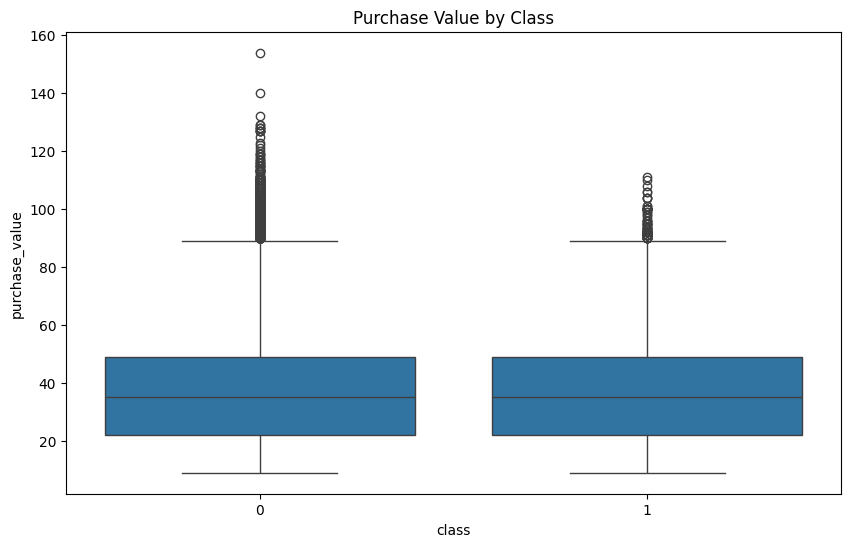

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Class')
plt.show()

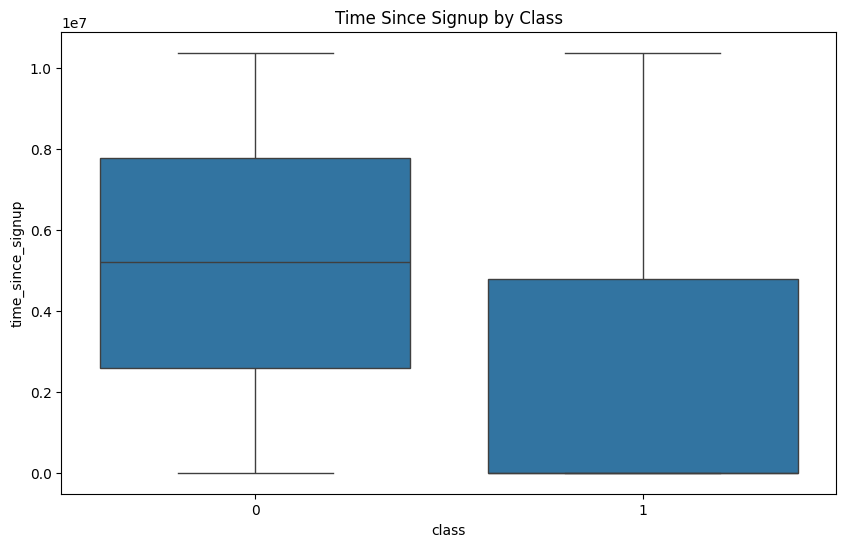

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='time_since_signup', data=fraud_df)
plt.title('Time Since Signup by Class')
plt.show()